COMP5318 - Machine Learning and Data Mining: Assignment 1

In [91]:
import pandas as pd
import os
print(os.listdir("./Input/train"))
pd.set_option('display.max_columns', 10)

from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

['.DS_Store', 'train.csv']


In [243]:
# train.csv including feature and label using for training model.
data_train_df = pd.read_csv('./Input/train/train.csv') 

In [244]:
data_train_df

,id,v1,v2,v3,v4,...,v781,v782,v783,v784,label
0,0,0,0,0,0,...,0,0,0,0,2
1,1,0,0,0,0,...,0,0,0,0,1
2,2,0,0,0,0,...,0,0,0,0,1
3,3,0,0,0,1,...,0,0,0,0,4
4,4,0,0,0,0,...,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,0,0,0,0,...,0,0,0,0,5
29996,29996,0,0,0,0,...,0,0,0,0,4
29997,29997,0,0,0,0,...,0,0,0,0,9
29998,29998,0,0,0,0,...,0,0,0,0,3


In [245]:
# Selecting input feature
data_train_feature = data_train_df.loc[:, "v1":"v784"].to_numpy()

# Selecting output lable 
data_train_label = data_train_df.label.to_numpy()

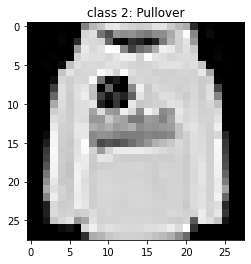

In [246]:
import matplotlib.pyplot as plt
data_train_feature = data_train_feature.reshape((data_train_feature.shape[0], 28, 28))
plt.imshow(data_train_feature[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(data_train_label[0]) + ": Pullover" )
plt.show()

In [247]:
data_train_df.loc[:, "v1":"v784"]

,v1,v2,v3,v4,v5,...,v780,v781,v782,v783,v784
0,0,0,0,0,1,...,0,0,0,0,0
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,0,0,...,0,0,0,0,0
3,0,0,0,1,0,...,61,0,0,0,0
4,0,0,0,0,0,...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,...,0,0,0,0,0
29996,0,0,0,0,0,...,0,0,0,0,0
29997,0,0,0,0,0,...,0,0,0,0,0
29998,0,0,0,0,0,...,0,0,0,0,0


In [248]:
data_train_feature.shape

(30000, 28, 28)

In [249]:
data_train_feature = data_train_feature.reshape(30000, 28*28)
data_train_feature.shape

(30000, 784)

In [257]:
from sklearn.preprocessing import StandardScaler

data_train_feature = StandardScaler().fit_transform(data_train_feature)
data_train_feature

array([[-0.01014385, -0.02499648, -0.03238761, ..., -0.15798984,
        -0.09088067, -0.03478979],
       [-0.01014385, -0.02499648, -0.03238761, ..., -0.15798984,
        -0.09088067, -0.03478979],
       [-0.01014385, -0.02499648, -0.03238761, ..., -0.15798984,
        -0.09088067, -0.03478979],
       ...,
       [-0.01014385, -0.02499648, -0.03238761, ..., -0.15798984,
        -0.09088067, -0.03478979],
       [-0.01014385, -0.02499648, -0.03238761, ..., -0.15798984,
        -0.09088067, -0.03478979],
       [-0.01014385, -0.02499648, -0.03238761, ..., -0.15798984,
        -0.09088067, -0.03478979]])

In [305]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
principalComponents = pca.fit_transform(data_train_feature)

principalDf = pd.DataFrame(data = principalComponents)

principalDf

,0,1,2,3,4,...,131,132,133,134,135
0,22.495533,11.875091,6.396752,5.326375,4.269581,...,0.677161,-1.277991,0.559098,0.933212,-0.142462
1,0.435422,-12.352984,0.449348,2.581978,2.138017,...,-0.501041,0.144672,-0.765969,0.895887,-0.403531
2,1.562939,-16.438414,-8.552417,-1.373359,-0.976645,...,-0.867236,-0.130713,0.236547,-0.041518,-0.425678
3,13.459020,5.080425,8.668808,-2.642909,-3.999970,...,0.521669,-0.231514,-0.517123,-0.004914,0.182503
4,2.769235,22.048937,-3.714981,-14.068346,14.472508,...,0.706598,-0.879441,-0.346701,-1.442012,0.381729
...,...,...,...,...,...,...,...,...,...,...,...
29995,-20.395138,0.086465,4.236264,-2.288970,0.014990,...,0.125277,0.052015,0.251556,0.657627,-0.918556
29996,-5.363247,-9.628475,-2.252107,-0.791788,-0.530443,...,0.004678,-0.058199,-0.782804,-0.070500,-0.097817
29997,-15.648294,12.585432,-4.970752,-8.581938,-1.221045,...,1.121711,1.006608,0.593824,0.168751,0.045481
29998,10.767354,-15.050426,-10.956921,-1.811057,-0.511828,...,0.523640,0.401814,-0.868587,0.005266,-0.177303


In [306]:
finalDf = pd.concat([principalDf, data_train_df.label], axis = 1)
finalDf

,0,1,2,3,4,...,132,133,134,135,label
0,22.495533,11.875091,6.396752,5.326375,4.269581,...,-1.277991,0.559098,0.933212,-0.142462,2
1,0.435422,-12.352984,0.449348,2.581978,2.138017,...,0.144672,-0.765969,0.895887,-0.403531,1
2,1.562939,-16.438414,-8.552417,-1.373359,-0.976645,...,-0.130713,0.236547,-0.041518,-0.425678,1
3,13.459020,5.080425,8.668808,-2.642909,-3.999970,...,-0.231514,-0.517123,-0.004914,0.182503,4
4,2.769235,22.048937,-3.714981,-14.068346,14.472508,...,-0.879441,-0.346701,-1.442012,0.381729,8
...,...,...,...,...,...,...,...,...,...,...,...
29995,-20.395138,0.086465,4.236264,-2.288970,0.014990,...,0.052015,0.251556,0.657627,-0.918556,5
29996,-5.363247,-9.628475,-2.252107,-0.791788,-0.530443,...,-0.058199,-0.782804,-0.070500,-0.097817,4
29997,-15.648294,12.585432,-4.970752,-8.581938,-1.221045,...,1.006608,0.593824,0.168751,0.045481,9
29998,10.767354,-15.050426,-10.956921,-1.811057,-0.511828,...,0.401814,-0.868587,0.005266,-0.177303,3


In [287]:
from sklearn.model_selection import train_test_split

In [288]:
pca_train_feature = principalDf.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    pca_train_feature, data_train_label, random_state=0)

In [289]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (22500, 136)
y_train shape: (22500,)


In [290]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (7500, 136)
y_test shape: (7500,)


In [291]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [292]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [293]:
y_pred = knn.predict(X_test)
y_pred

array([5, 3, 6, ..., 9, 1, 8])

In [294]:
knn.score(X_test, y_test)

0.8318666666666666

In [347]:
# test_input.csv includes 5000 samples used for label prediction. Test samples do not have labels.
data_test_df = pd.read_csv('./Input/test/test_input.csv') 
data_test_feature = data_test_df.to_numpy()

data_test_feature = StandardScaler().fit_transform(data_test_feature)

pca = PCA(n_components=136)
test_principalComponents = pca.fit_transform(data_test_feature)

test_principalDf.shape
print(test_principalDf[0])

[ 6.00307149e+00 -1.45958084e+01 -8.67246442e+00 -3.00243336e+00
 -6.65259742e-01  5.12782105e+00  2.74484710e+00  9.60133880e-01
 -1.02848945e+00  1.63301261e+00 -4.44017079e+00  4.96324724e-02
  1.04105755e+00  2.69425064e+00  1.05668374e+00 -2.51037626e+00
 -1.46622526e-01  2.12766549e-02 -1.17980681e+00  1.15437510e+00
 -2.45498680e+00 -2.60044630e-01  2.06207693e-01  7.81705481e-01
 -1.03957856e+00 -1.10777614e+00 -8.13984330e-02  1.54162941e+00
 -1.14015715e+00 -1.13391444e-01 -2.08813652e-01  3.44343748e-01
 -2.45411207e+00 -2.37635738e+00 -1.80236427e+00  1.22841360e-01
 -2.69628717e-01  4.88933272e-01 -7.12206509e-01 -1.29486099e+00
  5.83558358e-01 -4.40607979e-01 -3.06589282e-01 -4.11163773e-01
  1.16440502e+00  8.34678576e-01 -1.21176889e+00  1.34286906e-01
  4.32395106e-02  2.85029196e-01  5.66871054e-02  1.79933511e+00
  1.32576799e+00 -4.51723995e-01 -8.14287343e-02  6.30063544e-01
 -6.86325877e-01  2.66061958e+00 -1.05148793e-01 -1.18130214e-01
 -1.38716353e+00 -1.39482

In [353]:
predictions = []

for i in test_principalDf:
    prediction = knn.predict([list(i)])
    predictions.append(prediction[0])
    
predictions

[0,
 0,
 3,
 0,
 6,
 8,
 3,
 4,
 9,
 5,
 9,
 7,
 8,
 4,
 6,
 6,
 0,
 2,
 5,
 1,
 0,
 4,
 2,
 7,
 3,
 2,
 9,
 6,
 7,
 5,
 8,
 7,
 8,
 3,
 7,
 9,
 2,
 6,
 2,
 3,
 2,
 0,
 4,
 2,
 3,
 6,
 2,
 7,
 0,
 0,
 6,
 2,
 9,
 7,
 3,
 0,
 7,
 3,
 3,
 9,
 2,
 6,
 9,
 0,
 5,
 0,
 6,
 2,
 9,
 3,
 7,
 6,
 4,
 9,
 9,
 8,
 7,
 3,
 0,
 7,
 4,
 6,
 7,
 8,
 3,
 7,
 6,
 6,
 7,
 6,
 3,
 4,
 0,
 3,
 3,
 9,
 6,
 5,
 3,
 8,
 9,
 7,
 4,
 1,
 3,
 2,
 4,
 7,
 2,
 9,
 6,
 3,
 9,
 3,
 6,
 7,
 6,
 7,
 4,
 3,
 2,
 6,
 3,
 7,
 9,
 8,
 3,
 0,
 3,
 4,
 4,
 6,
 7,
 6,
 4,
 6,
 7,
 7,
 1,
 8,
 2,
 0,
 2,
 3,
 8,
 3,
 9,
 4,
 3,
 4,
 0,
 4,
 4,
 6,
 3,
 8,
 4,
 0,
 1,
 2,
 3,
 0,
 9,
 2,
 6,
 0,
 2,
 7,
 9,
 6,
 8,
 7,
 1,
 1,
 2,
 1,
 3,
 8,
 5,
 4,
 9,
 4,
 6,
 5,
 9,
 0,
 6,
 2,
 5,
 9,
 2,
 8,
 9,
 2,
 6,
 6,
 7,
 9,
 4,
 9,
 7,
 5,
 0,
 7,
 7,
 6,
 9,
 7,
 0,
 2,
 6,
 7,
 7,
 6,
 2,
 7,
 4,
 7,
 4,
 5,
 9,
 6,
 6,
 0,
 3,
 9,
 3,
 9,
 7,
 7,
 9,
 7,
 5,
 7,
 6,
 0,
 9,
 6,
 1,
 0,
 0,
 7,
 9,
 1,
 3,
 8,
 6,
 3,
 1,
 3,


In [355]:
len(predictions)

5000

In [365]:
final_test_df = pd.DataFrame(predictions
final_test_df.insert(0, 'id', range(0,len(final_test_df)))
final_test_df.columns = ['id', 'label']
final_test_df

TypeError: Index(...) must be called with a collection of some kind, False was passed

In [368]:
final_test_df.to_csv('testPredictions.csv', index = False)